## Klasyfikacja z użyciem sztucznych neuronów

W ramach wstępu do tematyki sieci neuronowych przedstawiony zostanie pojedynczy sztuczny neuron, a następnie pojedyncza warstwa sztucznych neuronów, w zadaniu klasyfikacji do liniowo separowalnych klas.

### Klasyfikacja

Klasyfikacja jest bardzo istotnym zadaniem uczenia maszynowego, polegającym na automatycznym przypisywaniu (klasyfikowaniu) jakichś danych (liczbowych, tekstowych, wizualnych) do jednej z ustalonych kategorii, które najczęściej znamy i rozumiemy:


*   Zdjęcie płuca - chore / zdrowe
*   Treść maila - spam / nie spam
*   Pomiary odcisku łapy - niedźwiedź / wilk / sarna / żubr
*   Odwiedzone strony internetowe - wykształcenie podstawowe / średnie / wyższe



### Tło biologiczne

W bardzo dużym (i nie całkiem poprawnym, bo biologia jest znacznie bardziej skomplikowana) uproszczeniu, biologiczny neuron posiada wiele "wejść" (dendrytów) i jedno "wyjście" (akson). Sygnały przychodzące dendrytami mogą być pobudzające lub hamujące. Gdy pobudzenie jest odpowiednio duże, neuron wysyła sygnał w dół aksonu, "komunikując się" w ten sposób z innymi neuronami.

### Perceptron

Najprostszym modelem sztucznego neuronu jest perceptron, który agreguje wejścia $x_1, x_2, ... , x_n$ i na podstawie funkcji aktywacji przetwarza je na wyjście $y$, co można opisać wzorem:

$y = f(\sum_i (x_iw_i) + b)$

Najczęściej używaną funkcją aktywacji we wczesnym perceptronie była prosta funkcja:

$f(x)=
\begin{cases}
0, x < 0 \\
1, x \geq 0 
\end{cases}$

symulująca zachowanie faktycznych neuronów (kiedy pobudzenie przekracza próg, wysyłają sygnał)

Schemat perceptronu został zaprezentowany poniżej:

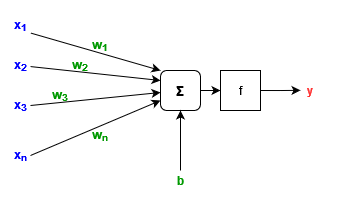

Można zauważyć, że pojedynczy perceptron reprezentuje funkcję, która jest warta 1, kiedy $\sum_i (x_iw_i) + b \geq 0$. 

Przypomnienie z algebry: dla dwuwymiarowej przestrzeni z osiami opisanymi $x_1$, $x_2$ wzór $w_1x_1+w_2x_2+b = 0$ opisuje prostą, a $w_1x_1+w_2x_2+b \geq 0$ półpłaszczyznę. Dla wyższych wymiarów będzie to jakaś hiperpłaszczyzna separująca $R^n$ na dwie części.

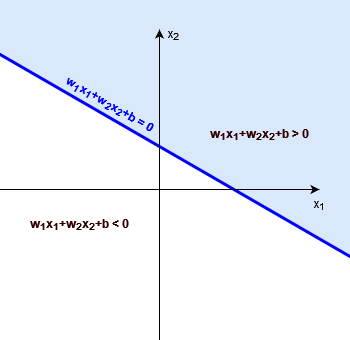

Żeby perceptron mógł skutecznie dokonać klasyfikacji, klasy muszą być **liniowo separowalne!**

### Jak znaleźć wagi?

* Mamy zbiór punktów, na których "uczymy" perceptron (znamy ich klasę)
* Losujemy początkowe wagi
* Podajemy punkt, sprawdzamy, czy klasa przewidziana przez perceptron zgadza się z faktyczną klasą - na podstawie błędu zmieniamy wagi: $w_i^{k+1} = w_i^k + \Delta w_i^k$ (jak znaleźć $\Delta w_i^k$? - **odpowiedzi na wykładach**)
* Proces musimy powtórzyć odpowiednio dużo razy dla wszystkich danych uczących

Proces został przedstawiony poniżej:

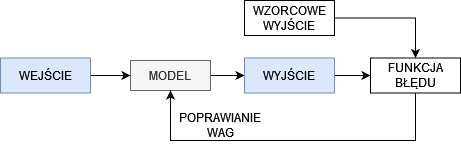

Jest to tzw. uczenie z nauczycielem, w którym poprawiamy model na podstawie różnicy między wyjściem a znanym, wzorcowym wyjściem. Wymaga to, żebyśmy znali poprawne etykiety klas, przynajmniej dla jakiegoś niewielkiego zbioru, który wykorzystujemy do uczenia i testowania sieci. Podziałem zbioru na klasy, kiedy poprawne etykiety nie są znane, zajmuje się klasteryzacja.

### Przykład perceptronu



In [7]:
from sklearn.linear_model import Perceptron
# dokumentacja perceptronu: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

# przygotowujemy wzorcowe dane uczące. X to współrzędne, y to klasa, do której należą
X = [[0.,0.],[1.,0.],[-1.,0],[-1.,-1],[1.,1]]
y = [0,1,0,0,1]

# przygotowujemy perceptron.
neuron = Perceptron(tol=1e-3, max_iter = 20)

# uczymy neuron przez wskazaną liczbę epok lub do zatrzymania się uczenia 
neuron.fit(X, y)

# możemy sprawdzić jak udane było uczenie:
neuron.score(X, y)

1.0

In [8]:
# Zobaczmy, jak wyglądają wagi neuronu:
neuron.coef_

array([[2., 1.]])

In [9]:
# Zobaczmy, jak wygląda bias neuronu:
neuron.intercept_

array([-1.])

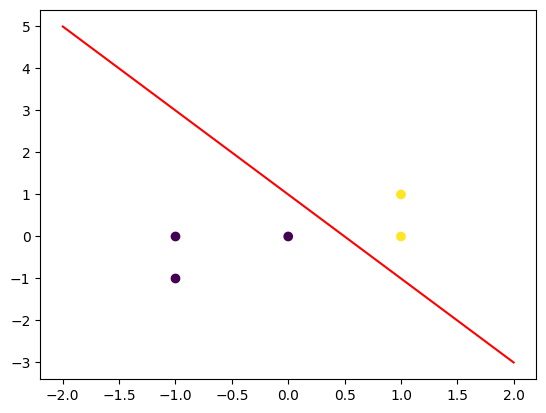

In [10]:
# Spróbujmy narysować funkcję, jaką przybliża neuron i jak wyglądają dane uczące:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(-2,2,100)
# wzór x2 = a*x1+c wymaga trochę prostych przekształceń algebraicznych z postaci w1x1+w2x2+b=0
x2 = -(1./neuron.coef_[0][1])*(neuron.coef_[0][0]*x1+neuron.intercept_[0])
plt.plot(x1, x2, '-r')

# od tego momentu dla wygody i uproszczenia zapisu stosowane będą arraye pakietu numpy, które pozwalają na łatwiejszą pracę z wielowymiarowymi danymi
plt.scatter(np.array(X)[:,0], np.array(X)[:,1], c=y)
plt.show()

### Próba ucząca a próba testująca

Zazwyczaj nauczony model ma działać na innych danych niż te, które posłużyły do jego uczenia - chcemy, żeby model był w stanie poradzić sobie poza samym środowiskiem uczącym! Zobaczmy, jak nasz model poradzi sobie dla zestawu punktów testujących.

In [11]:
X_test = np.array([[-0.8, 3.6],[0.,-1],[-0.2,-1],[0.4,-4],[1.5,5],[2.,3.],[1.2, -3.5],[-0.5,-3]])
y_test = [0,0,0,1,1,1,1,0]

# sprawdźmy ilość poprawnych trafień, tym razem dla zbioru testującego
neuron.score(X_test,y_test)

0.625

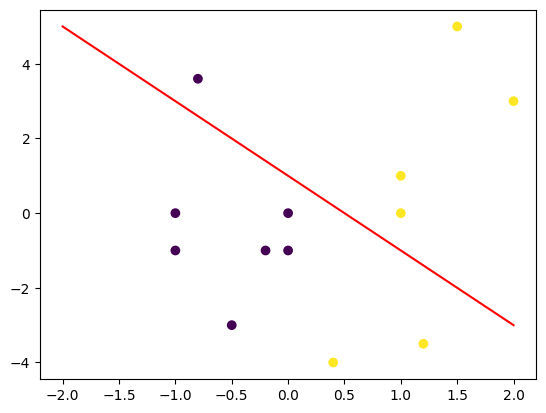

In [12]:
# Spróbujmy narysować zbiór uczący razem z testującym

plt.plot(x1, x2, '-r')
plt.scatter(np.array(X)[:,0], np.array(X)[:,1], c=y)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)

**Wniosek**: podział zbioru na dane uczące i testujące jest bardzo istotny!

### Macierz pomyłek

Sama skalarna wartość trafności sieci nie zawsze niesie wystarczające informacje o jakości klasyfikacji, czasem chcemy dowiedzieć się, do których klas częściej model przypisuje poprawnie (lub nie) punkty. Macierz pomyłek ma postać:

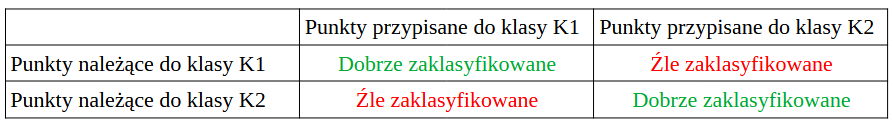

In [13]:
# zobaczmy macierz pomyłek dla naszego pojedynczego neuronu
from sklearn.metrics import confusion_matrix

y_predicted = neuron.predict(X_test)
confusion_matrix_model = confusion_matrix(y_test, y_predicted)
confusion_matrix_model

array([[3, 1],
       [2, 2]])

### Warstwa perceptronów

W wielu praktycznych zastosowaniach klasyfikujemy do większej liczby klas niż dwie. Możemy osiągnąć to za pomocą warstwy niezależnych od siebie perceptronów. Kombinacja wyjść perceptronów jest numerem klasy (np. w naturalnym systemie binarnym). Przykładowy podział przestrzeni za pomocą dwóch neuronów został przedstawiony na poniższym schemacie. Zakładamy, że pierwszy perceptron ma wagi w1, w2 i bias b, a drugi perceptron ma wagi v1, v2 i bias c.

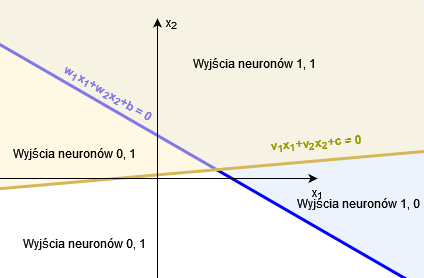

In [14]:
# przykład klasyfikacji do czterech klas za pomocą dwóch perceptronów

# tym razem skorzystamy z pseudolosowych rozkładów punktów.
X2 = np.concatenate((np.random.normal([-2,-2.5],[1,1],[200,2]), np.random.normal([-1.5,2],[1,1],[200,2]), np.random.normal([2.5,-1.8],[1,1],[200,2]), np.random.normal([3.2,2.0],[1,1],[200,2])))
y2 = np.concatenate((np.array([[0,0]]*200),np.array([[0,1]]*200),np.array([[1,0]]*200),np.array([[1,1]]*200)))

# na razie spróbujmy zrobić klasyfikację "ręcznie", tj. biorąc dwa niezależne neurony. Wszystkie biblioteki są w stanie zrobić to za nas, zrobimy to jednak na cele przykładu.
neuron_1 = Perceptron(tol=1e-3, max_iter = 20)
neuron_2 = Perceptron(tol=1e-3, max_iter = 20)

neuron_1.fit(X2, y2[:,0])
neuron_2.fit(X2, y2[:,1])

neuron_1.predict(X2)

y2_predict = np.vstack((neuron_1.predict(X2),neuron_2.predict(X2))).T

# ze względu na to, że podstawowa funkcja confusion_matrix nie obsługuje etykiet klas podanych jako arraye, zamieńmy je na liczby:
y2_labels = [2*i[0]+i[1] for i in y2]
y2_predict_labels = [2*i[0]+i[1] for i in y2_predict]

confusion_matrix_2 = confusion_matrix(y2_labels, y2_predict_labels)
confusion_matrix_2

array([[194,   3,   3,   0],
       [  3, 195,   0,   2],
       [  4,   0, 190,   6],
       [  0,   1,   7, 192]])

In [15]:
# zliczając elementy z diagonali możemy zobaczyć ilość poprawnych trafień:
accuracy = (confusion_matrix_2[0,0] + confusion_matrix_2[1,1] + confusion_matrix_2[2,2] + confusion_matrix_2[3,3]) / np.sum(confusion_matrix_2)
accuracy

0.96375

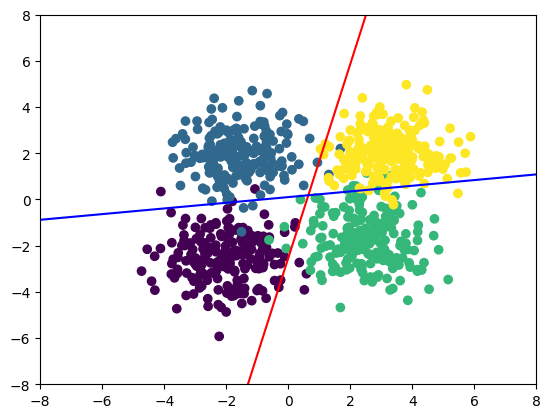

In [16]:
# wreszcie spróbujmy narysować zbiory i sposób, w jaki neurony podzieliły przestrzeń

x1 = np.linspace(-8,8,200)
neuron_1_x2 = -(1./neuron_1.coef_[0][1])*(neuron_1.coef_[0][0]*x1+neuron_1.intercept_[0])
neuron_2_x2 = -(1./neuron_2.coef_[0][1])*(neuron_2.coef_[0][0]*x1+neuron_2.intercept_[0])

plt.plot(x1, neuron_1_x2, '-r')
plt.plot(x1, neuron_2_x2, '-b')
plt.xlim(-8,8)
plt.ylim(-8,8)
plt.scatter(X2[:,0], X2[:,1], c=y2_labels)
plt.show()

Na szczęście niemal wszystkie modele wbudowane w biblioteki i moduły różnych języków pozwalają na bardziej elastyczną pracę na klasyfikacji do wielu klas. Przedstawione teraz zostanie prostsze wykorzystanie klasy Perceptron dla tych samych danych.

In [17]:
perceptron_layer = Perceptron(tol=1e-3, max_iter = 20)

# przypomnienie, że y2 labels zawiera wartości 0,1,2,3 zamiast 00, 01, 10, 11.
perceptron_layer.fit(X2, y2_labels)
perceptron_layer.score(X2, y2_labels)

0.95

In [18]:
# zobaczmy wagi modelu. Zobaczymy, że jest ich odpowiednio więcej, bo model musiał stworzyć więcej neuronów:
perceptron_layer.coef_

array([[-5.07567197, -7.93424728],
       [-7.53215349,  7.42995115],
       [ 3.81371953, -6.58458247],
       [ 7.91073892, 12.05597939]])

In [19]:
# zobaczmy biasy modelu:
perceptron_layer.intercept_

array([-15., -13., -20., -28.])

Widzimy, że Perceptron z modułu Sklearn stworzył aż cztery neurony. Wynika to z różnic w kodowaniu rozwiązania. Możemy zobaczyć, jak wygląda podział przestrzeni wygenerowany przez klasę.

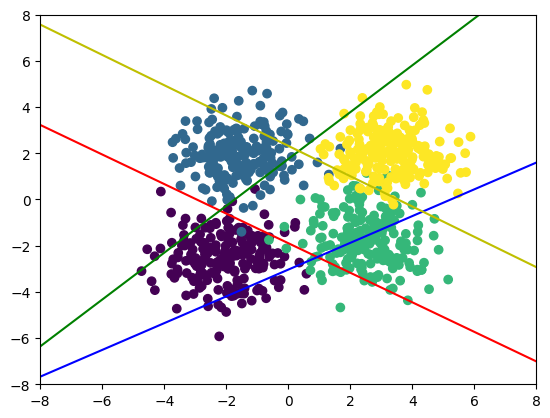

In [20]:
x1 = np.linspace(-8,8,200)
separation_1 = -(1./perceptron_layer.coef_[0][1])*(perceptron_layer.coef_[0][0]*x1+perceptron_layer.intercept_[0])
separation_2 = -(1./perceptron_layer.coef_[1][1])*(perceptron_layer.coef_[1][0]*x1+perceptron_layer.intercept_[1])
separation_3 = -(1./perceptron_layer.coef_[2][1])*(perceptron_layer.coef_[2][0]*x1+perceptron_layer.intercept_[2])
separation_4 = -(1./perceptron_layer.coef_[3][1])*(perceptron_layer.coef_[3][0]*x1+perceptron_layer.intercept_[3])

plt.plot(x1, separation_1, '-r')
plt.plot(x1, separation_2, '-g')
plt.plot(x1, separation_3, '-b')
plt.plot(x1, separation_4, '-y')
plt.xlim(-8,8)
plt.ylim(-8,8)
plt.scatter(X2[:,0], X2[:,1], c=y2_labels)
plt.show()

Można zauważyć, że większa liczba neuronów dokonuje separacji przestrzeni na więcej części, co może jednak wymagać dłuższego uczenia i przyczynia się do zwiększenia poziomu skomplikowania modelu. W wypadku liczby zbiorów tak małej jak cztery, w dwuwymiarowej przestrzeni na szczęście nie musimy się tym (raczej) przejmować. Warto też zauważyć, że nie wszystkie części przestrzeni są wykorzystane, z czym będziemy mieć do czynienia właściwie zawsze (chyba, że ilość naszych klas jest potęgą liczby 2).

# Zadania do samodzielnego wykonania

1)

Proszę wygenerować dane przypisane do dwóch klas K1 i K2, pochodzące z rozkładów normalnych N([0,-1],1) i N([1,1],1). Próba testująca powinna zawierać 200 punktów. Proszę sprawdzić skuteczność klasyfikacji dla 5, 10, 20 oraz 100 punktów uczących. W każdym wypadku proszę ustalić wzór hiperpłaszczyzny (w naszym wypadku - prostej) oddzielającej klasy, a następnie pokazać ją na wykresie razem z danymi.

2)

Analiza próbek benzyny wykazała że może ona być przypisana do dwóch klas czystości A i B (dla potrzeb zadania można je oznaczyć 0 i 1). Proszę skorzystać z pliku fuel.txt, w którym pierwsze trzy kolumny to właściwości fizykochemiczne próbek, czwarta kolumna - klasa czystości.

Proszę sprawdzić skuteczność sieci opartej o pojedynczy neuron do klasyfikacji w tym problemie, porównując wyniki dla pięciokrotnego uczenia sieci. Proszę potraktować wszystkie dane jako dane uczące.

3)

Proszę pobrać zbiór https://archive.ics.uci.edu/ml/datasets/iris. Można to też zrobić w pythonie używając funkcji sklearn.datasets.load_iris( ). Następnie proszę dokonać samodzielnego podziału na dane uczące i testujące w proporcji 80%/20%. Proszę zbudować sieć złożoną z pojedynczej warstwy perceptronów (np. używając omawianej już tutaj funkcji sklearn.linear_model.Perceptron), której zadaniem będzie jak najdokładniejsza klasyfikacja gatunków irysów na podstawie ich pomiarów. Proszę dokonać analizy macierzy pomyłek dla kilku uruchomień algorytmu. Zachęcam do rozważenia pytania: jaką największą trafność jest w stanie uzyskać w klasyfikacji irysów z podanego zbioru pojedyncza warstwa perceptronów? Dlaczego? (Podpowiedź: polecamy przyjrzeć się pojęciu liniowej separowalności)

4)

Proszę spróbować podzielić zbiór irysów na zbiór uczący i testujący na co najmniej 3 różne sposoby. Jak duży jest wpływ podziału na wynik?

5)

Proszę sprawdzić wpływ ilości epok na poprawność klasyfikacji zbioru irysów z poprzednich zadań, dla wybranych ilości epok (polecamy spróbować od jak najmniejszej, np. od 1 lub 2 epok). Żeby zapobiec wcześniejszemu przerywaniu uczenia, w pakiecie Sklearn można ustalić argument tol na odpowiednio małą liczbę czy ustawiając argument early_stopping na False. Można też zamiast tego (lub dodatkowo) nie wyłączać tych kryteriów i zamiast tego prawdzić wartość ilość faktycznych epok potrzebnych do ich osiągnięcia (n_iter_) Proszę przedstawić wnioski, np. na wykresie zależności średniej trafności klasyfikacji na zbiorze testującym w zależności od liczby epok.

Dokładność dla 5 ilosci prob (dane testujące): 0.82
Dokładność dla 5 ilosci prob (dane uczące) : 1.0


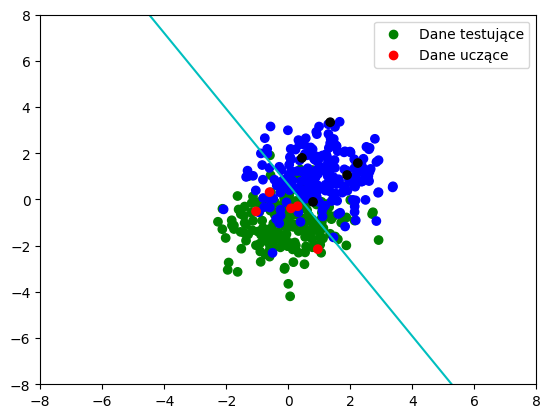

Dokładność dla 10 ilosci prob (dane testujące): 0.835
Dokładność dla 10 ilosci prob (dane uczące) : 0.9


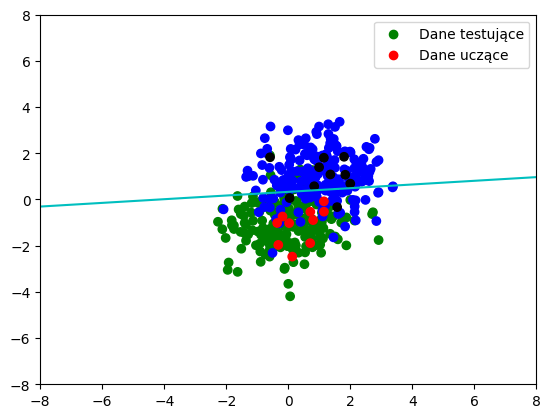

Dokładność dla 20 ilosci prob (dane testujące): 0.87
Dokładność dla 20 ilosci prob (dane uczące) : 0.925


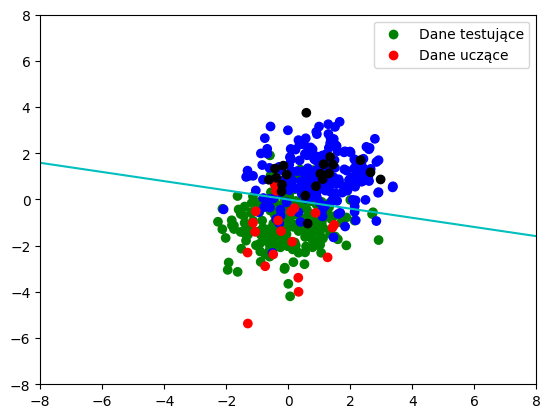

Dokładność dla 100 ilosci prob (dane testujące): 0.85
Dokładność dla 100 ilosci prob (dane uczące) : 0.86


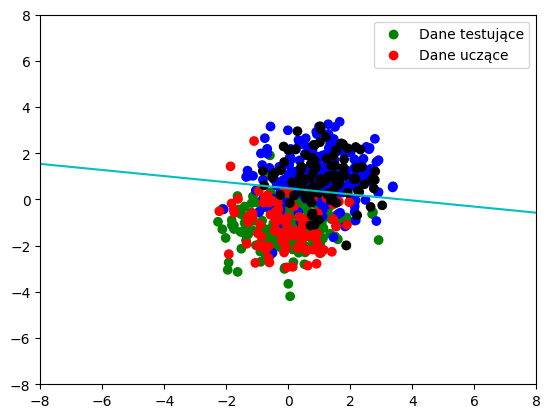

In [25]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

x_test = np.concatenate((np.random.normal([0,-1],[1,1],[200,2]), np.random.normal([1,1],[1,1],[200,2])))
y_test = np.concatenate((np.array([0]*200),np.array([1]*200)))

counter = [5, 10, 20, 100]

for i in counter:
  x_learn = np.concatenate((np.random.normal([0,-1],[1,1],[i,2]), np.random.normal([1,1],[1,1],[i,2])))
  y_learn = np.concatenate((np.array([0]*i),np.array([1]*i)))
  neuron = Perceptron(tol=1e-3, max_iter = 20)
  neuron.fit(x_learn, y_learn)
  neuron.score(x_test, y_test)

  print(f'Dokładność dla {i} ilosci prob (dane testujące): {neuron.score(x_test, y_test)}')
  print(f'Dokładność dla {i} ilosci prob (dane uczące) : {neuron.score(x_learn, y_learn)}')
  x1 = np.linspace(-8, 8, 200)
  x2 = -(1./neuron.coef_[0][1])*(neuron.coef_[0][0]*x1+neuron.intercept_[0])

  plt.plot(x1, x2, '-c')
  plt.xlim(-8,8)
  plt.ylim(-8,8)
  plt.scatter(x_test[:,0], x_test[:,1], c= ['g' if i==0 else 'b' for i in y_test], label='Dane testujące')
  plt.scatter(x_learn[:,0], x_learn[:,1], c= ['r' if i==0  else 'k' for i in y_learn], label='Dane uczące')
  plt.legend()
  plt.show()

Numer interacji: 0, dokładność: 0.5333333333333333
[[15  0]
 [14  1]]
Współczynniki [[ 2.7543 19.7263 -6.6355]]


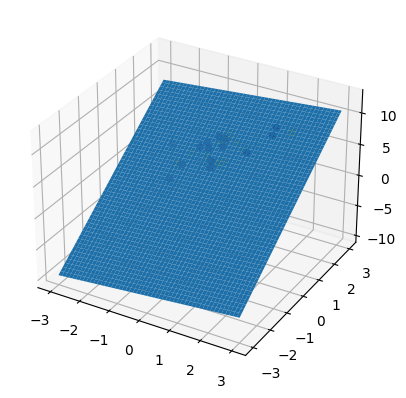

Numer interacji: 1, dokładność: 0.5333333333333333
[[15  0]
 [14  1]]
Współczynniki [[ 2.7543 19.7263 -6.6355]]


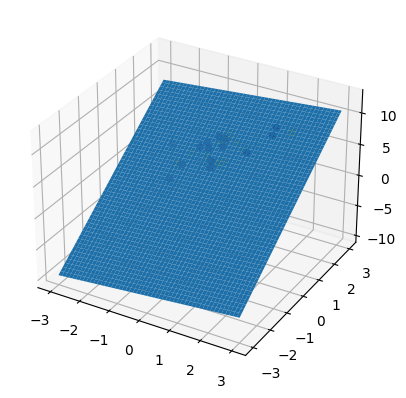

Numer interacji: 2, dokładność: 0.5333333333333333
[[15  0]
 [14  1]]
Współczynniki [[ 2.7543 19.7263 -6.6355]]


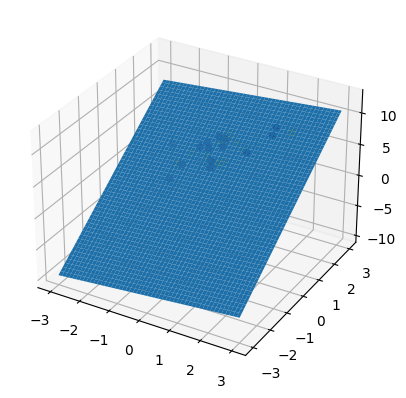

Numer interacji: 3, dokładność: 0.5333333333333333
[[15  0]
 [14  1]]
Współczynniki [[ 2.7543 19.7263 -6.6355]]


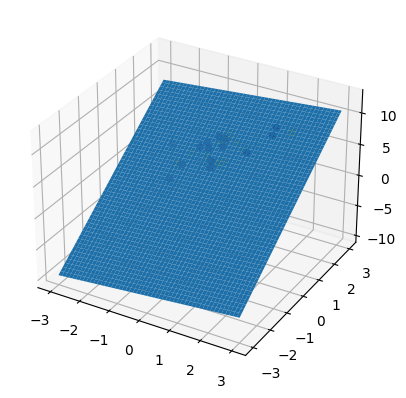

Numer interacji: 4, dokładność: 0.5333333333333333
[[15  0]
 [14  1]]
Współczynniki [[ 2.7543 19.7263 -6.6355]]


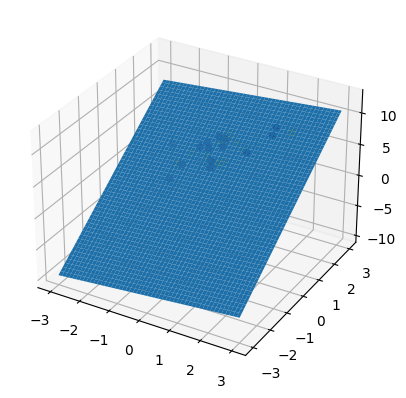

In [1]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('./fuel.txt')
x = data[:,0:3]
y = data[:,-1]

for i in range(5):
  neuron = Perceptron(tol=1e-3, max_iter = 100)
  neuron.fit(x, y)
  neuron.score(x, y)
  print(f'Numer interacji: {i}, dokładność: {neuron.score(x, y)}')

  y_predicted = neuron.predict(x)
  confusion_matrix_model = confusion_matrix(y, y_predicted)
  print(confusion_matrix_model)

  print(f'Współczynniki {neuron.coef_}')

  x1 = np.linspace(-3, 3, 200)
  x2 = np.linspace(-3, 3, 200)
  x1, x2 = np.meshgrid(x1,x2)
  x3 = np.array(-(1./neuron.coef_[0][2])*(neuron.coef_[0][0]*x1 + neuron.coef_[0][1]*x2 + neuron.intercept_[0]))

  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')

  ax.scatter(x[:,0], x[:,1], x[:,2], c=[1 if cl == 1.0 else 0 for cl in y ])
  ax.plot_surface(x1, x2, x3)
  plt.show()

Proszę pobrać zbiór https://archive.ics.uci.edu/ml/datasets/iris. Można to też zrobić w pythonie używając funkcji sklearn.datasets.load_iris( ). Następnie proszę dokonać samodzielnego podziału na dane uczące i testujące w proporcji 80%/20%. Proszę zbudować sieć złożoną z pojedynczej warstwy perceptronów (np. używając omawianej już tutaj funkcji sklearn.linear_model.Perceptron), której zadaniem będzie jak najdokładniejsza klasyfikacja gatunków irysów na podstawie ich pomiarów. Proszę dokonać analizy macierzy pomyłek dla kilku uruchomień algorytmu. Zachęcam do rozważenia pytania: jaką największą trafność jest w stanie uzyskać w klasyfikacji irysów z podanego zbioru pojedyncza warstwa perceptronów? Dlaczego? (Podpowiedź: polecamy przyjrzeć się pojęciu liniowej separowalności)

In [33]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import random

def split_data(ratio, d):
    data_len = len(d)
    part_1 = int(ratio*data_len)
    return d[:part_1], d[part_1:]

data = load_iris()

x_data = data.data
y_data = data.target

x_k1 = [ x_data[i] for i in range(len(y_data)) if y_data[i] == 0 ]
x_k2 = [ x_data[i] for i in range(len(y_data)) if y_data[i] == 1 ]
x_k3 = [ x_data[i] for i in range(len(y_data)) if y_data[i] == 2 ]


for _ in range(5):
    random.shuffle(x_k1)
    random.shuffle(x_k2)
    random.shuffle(x_k3)

    k1_learn, k1_test = split_data(0.8, x_k1)
    k2_learn, k2_test = split_data(0.8, x_k2)
    k3_learn, k3_test = split_data(0.8, x_k3)

    x_learn = np.concatenate((k1_learn, k2_learn, k3_learn))
    y_learn = np.concatenate((np.array([0]*len(k1_learn)), np.array([1]*len(k2_learn)), np.array([2]*len(k1_learn))))

    x_test = np.concatenate((k1_test, k2_test, k3_test))
    y_test = np.concatenate((np.array([0]*len(k1_test)), np.array([1]*len(k2_test)), np.array([2]*len(k1_test))))
    neuron = Perceptron(tol=1e-3, max_iter = 25)
    for i in range(5):
        neuron.fit(x_learn, y_learn)
        neuron.score(x_test, y_test)

        print(f'Numer interacji: {i}, dokładność: {neuron.score(x_test, y_test)}')

        y_predicted = neuron.predict(x_test)
        confusion_matrix_model = confusion_matrix(y_test, y_predicted)
        print(confusion_matrix_model)


Numer interacji: 0, dokładność: 0.6
[[ 8  2  0]
 [ 0 10  0]
 [ 0 10  0]]
Numer interacji: 1, dokładność: 0.6
[[ 8  2  0]
 [ 0 10  0]
 [ 0 10  0]]
Numer interacji: 2, dokładność: 0.6
[[ 8  2  0]
 [ 0 10  0]
 [ 0 10  0]]
Numer interacji: 3, dokładność: 0.6
[[ 8  2  0]
 [ 0 10  0]
 [ 0 10  0]]
Numer interacji: 4, dokładność: 0.6
[[ 8  2  0]
 [ 0 10  0]
 [ 0 10  0]]
Numer interacji: 0, dokładność: 0.4
[[ 2  8  0]
 [ 0 10  0]
 [ 0 10  0]]
Numer interacji: 1, dokładność: 0.4
[[ 2  8  0]
 [ 0 10  0]
 [ 0 10  0]]
Numer interacji: 2, dokładność: 0.4
[[ 2  8  0]
 [ 0 10  0]
 [ 0 10  0]]
Numer interacji: 3, dokładność: 0.4
[[ 2  8  0]
 [ 0 10  0]
 [ 0 10  0]]
Numer interacji: 4, dokładność: 0.4
[[ 2  8  0]
 [ 0 10  0]
 [ 0 10  0]]
Numer interacji: 0, dokładność: 0.9
[[ 9  1  0]
 [ 0 10  0]
 [ 0  2  8]]
Numer interacji: 1, dokładność: 0.9
[[ 9  1  0]
 [ 0 10  0]
 [ 0  2  8]]
Numer interacji: 2, dokładność: 0.9
[[ 9  1  0]
 [ 0 10  0]
 [ 0  2  8]]
Numer interacji: 3, dokładność: 0.9
[[ 9  1  0]
 [ 

list

Proszę spróbować podzielić zbiór irysów na zbiór uczący i testujący na co najmniej 3 różne sposoby. Jak duży jest wpływ podziału na wynik?

In [31]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

def split_data(ratio, d):
    data_len = len(d)
    part_1 = int(ratio*data_len)
    return d[:part_1], d[part_1:]

data = load_iris()

x_data = data.data
y_data = data.target

x_k1 = [ x_data[i] for i in range(len(y_data)) if y_data[i] == 0 ]
x_k2 = [ x_data[i] for i in range(len(y_data)) if y_data[i] == 1 ]
x_k3 = [ x_data[i] for i in range(len(y_data)) if y_data[i] == 2 ]

for ratio in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    random.shuffle(x_k1)
    random.shuffle(x_k2)
    random.shuffle(x_k3)

    k1_learn, k1_test = split_data(ratio, x_k1)
    k2_learn, k2_test = split_data(ratio, x_k2)
    k3_learn, k3_test = split_data(ratio, x_k3)

    x_learn = np.concatenate((k1_learn, k2_learn, k3_learn))
    y_learn = np.concatenate((np.array([0]*len(k1_learn)), np.array([1]*len(k2_learn)), np.array([2]*len(k1_learn))))

    x_test = np.concatenate((k1_test, k2_test, k3_test))
    y_test = np.concatenate((np.array([0]*len(k1_test)), np.array([1]*len(k2_test)), np.array([2]*len(k1_test))))
    neuron = Perceptron(tol=1e-3, max_iter = 25)
    neuron.fit(x_learn, y_learn)
    neuron.score(x_test, y_test)

    print(f'% Danych uczących: {ratio}, dokładność: {neuron.score(x_test, y_test)}')

    y_predicted = neuron.predict(x_test)
    confusion_matrix_model = confusion_matrix(y_test, y_predicted)
    print(confusion_matrix_model)

% Danych uczących: 0.2, dokładność: 0.6666666666666666
[[40  0  0]
 [ 7  0 33]
 [ 0  0 40]]
% Danych uczących: 0.3, dokładność: 0.6761904761904762
[[35  0  0]
 [ 0 35  0]
 [ 0 34  1]]
% Danych uczących: 0.4, dokładność: 0.7666666666666667
[[30  0  0]
 [ 2  9 19]
 [ 0  0 30]]
% Danych uczących: 0.5, dokładność: 0.6666666666666666
[[25  0  0]
 [20  0  5]
 [ 0  0 25]]
% Danych uczących: 0.6, dokładność: 0.6666666666666666
[[20  0  0]
 [ 3  0 17]
 [ 0  0 20]]
% Danych uczących: 0.7, dokładność: 0.6666666666666666
[[15  0  0]
 [ 0  0 15]
 [ 0  0 15]]
% Danych uczących: 0.8, dokładność: 0.6666666666666666
[[10  0  0]
 [ 0  0 10]
 [ 0  0 10]]
% Danych uczących: 0.9, dokładność: 0.6666666666666666
[[5 0 0]
 [5 0 0]
 [0 0 5]]


Proszę sprawdzić wpływ ilości epok na poprawność klasyfikacji zbioru irysów z poprzednich zadań, dla wybranych ilości epok (polecamy spróbować od jak najmniejszej, np. od 1 lub 2 epok). Żeby zapobiec wcześniejszemu przerywaniu uczenia, w pakiecie Sklearn można ustalić argument tol na odpowiednio małą liczbę czy ustawiając argument early_stopping na False. Można też zamiast tego (lub dodatkowo) nie wyłączać tych kryteriów i zamiast tego prawdzić wartość ilość faktycznych epok potrzebnych do ich osiągnięcia (n_iter_) Proszę przedstawić wnioski, np. na wykresie zależności średniej trafności klasyfikacji na zbiorze testującym w zależności od liczby epok.

/home/alfakp/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/alfakp/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/alfakp/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/alfakp/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/alfakp/.local/lib/python3.10/s

% Liczba epok: 1, dokładność: 0.6444444444444445
[[14  1  0]
 [ 0 15  0]
 [ 0 15  0]]
% Liczba epok: 2, dokładność: 0.6666666666666666
[[15  0  0]
 [ 0  0 15]
 [ 0  0 15]]
% Liczba epok: 3, dokładność: 0.5333333333333333
[[ 9  6  0]
 [ 0 15  0]
 [ 0 15  0]]
% Liczba epok: 5, dokładność: 0.9333333333333333
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]
% Liczba epok: 8, dokładność: 0.35555555555555557
[[ 1 14  0]
 [ 0 15  0]
 [ 0 15  0]]
% Liczba epok: 13, dokładność: 0.7777777777777778
[[15  0  0]
 [ 1  5  9]
 [ 0  0 15]]
% Liczba epok: 21, dokładność: 0.8222222222222222
[[14  1  0]
 [ 0 15  0]
 [ 0  7  8]]
% Liczba epok: 34, dokładność: 0.8222222222222222
[[14  1  0]
 [ 0 15  0]
 [ 0  7  8]]
% Liczba epok: 55, dokładność: 0.8222222222222222
[[14  1  0]
 [ 0 15  0]
 [ 0  7  8]]


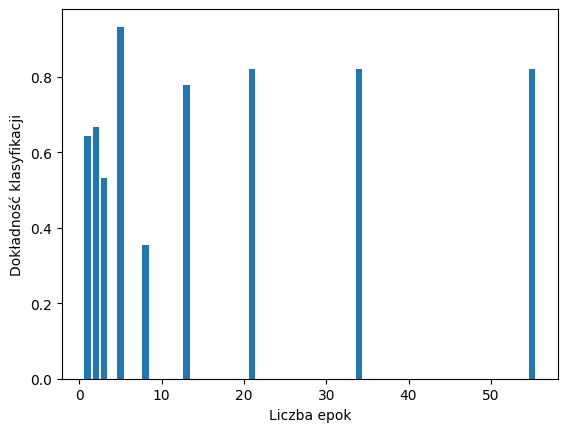

In [49]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

def split_data(ratio, d):
    data_len = len(d)
    part_1 = int(ratio*data_len)
    return d[:part_1], d[part_1:]

data = load_iris()

x_data = data.data
y_data = data.target

x_k1 = [ x_data[i] for i in range(len(y_data)) if y_data[i] == 0 ]
x_k2 = [ x_data[i] for i in range(len(y_data)) if y_data[i] == 1 ]
x_k3 = [ x_data[i] for i in range(len(y_data)) if y_data[i] == 2 ]

random.shuffle(x_k1)
random.shuffle(x_k2)
random.shuffle(x_k3)

ratio = 0.7

k1_learn, k1_test = split_data(ratio, x_k1)
k2_learn, k2_test = split_data(ratio, x_k2)
k3_learn, k3_test = split_data(ratio, x_k3)

x_learn = np.concatenate((k1_learn, k2_learn, k3_learn))
y_learn = np.concatenate((np.array([0]*len(k1_learn)), np.array([1]*len(k2_learn)), np.array([2]*len(k1_learn))))

x_test = np.concatenate((k1_test, k2_test, k3_test))
y_test = np.concatenate((np.array([0]*len(k1_test)), np.array([1]*len(k2_test)), np.array([2]*len(k1_test))))

x = []
y = []

for n_iter in [1, 2, 3, 5, 8, 13, 21, 34, 55]:
    neuron = Perceptron(tol=1e-5, max_iter = n_iter, early_stopping=False)
    neuron.fit(x_learn, y_learn)
    score = neuron.score(x_test, y_test)

    print(f'% Liczba epok: {n_iter}, dokładność: {score}')

    y_predicted = neuron.predict(x_test)
    confusion_matrix_model = confusion_matrix(y_test, y_predicted)
    print(confusion_matrix_model)
    x.append(n_iter)
    y.append(score)

plt.bar(x,y, label=x)
plt.xlabel('Liczba epok')
plt.ylabel('Dokładność klasyfikacji')
plt.show()
    

    


Polecamy skorzystać z dokumentacji i materiałów:

Podpinanie dysku google do notatnika (np. na cele pliku fuel.txt):
https://stackoverflow.com/questions/48376580/google-colab-how-to-read-data-from-my-google-drive

Pakiet Sklearn: 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html, https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

Tutorial pakietu numpy: https://numpy.org/doc/stable/user/quickstart.html

Wykorzystane funkcje pakietu numpy: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html, https://numpy.org/doc/stable/reference/generated/numpy.vstack.html

Dla zainteresowanych:

Zbiór danych irysów: https://en.wikipedia.org/wiki/Iris_flower_data_set